In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
%matplotlib inline

In [2]:
# path to data folder
train_data_path = "/home/jp_capo_98/Documents/ML-Silent-Speech-Recognition/Data/train_data/images/"
test_data_path = "/home/jp_capo_98/Documents/ML-Silent-Speech-Recognition/Data/test_data/images/"

In [3]:
# import train data
train_data = {"label":[], "ch1":[], "ch2":[], "ch3":[], "ch4":[]}
for folder in os.listdir(train_data_path):
    dataset_folder = train_data_path + folder + "/"
    for subdir in os.listdir(dataset_folder):
        label = subdir
        train_subdir = dataset_folder + subdir + "/"
        ch1_subdir = train_subdir + "ch1/"
        for file in os.listdir(ch1_subdir):
            ch1_filepath = train_subdir + "ch1/" + file
            ch2_filepath = train_subdir + "ch2/" + file
            ch3_filepath = train_subdir + "ch3/" + file
            ch4_filepath = train_subdir + "ch4/" + file
            train_data["label"].append(label)
            train_data["ch1"].append(ch1_filepath)
            train_data["ch2"].append(ch2_filepath)
            train_data["ch3"].append(ch3_filepath)
            train_data["ch4"].append(ch4_filepath)

In [4]:
train_data_df = pd.DataFrame(train_data)
train_data_df.head()

,ch1,ch2,ch3,ch4,label
0,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
1,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
2,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
3,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
4,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one


In [5]:
# import test_data
test_data = {"filename":[], "ch1":[], "ch2":[], "ch3":[], "ch4":[]}
for folder in os.listdir(test_data_path):
    filename = folder
    test_subdir = test_data_path + folder + "/"
    ch1_filepath = test_subdir + "ch1.png"
    ch2_filepath = test_subdir + "ch2.png"
    ch3_filepath = test_subdir + "ch3.png"
    ch4_filepath = test_subdir + "ch4.png"
    test_data["filename"].append(filename)
    test_data["ch1"].append(ch1_filepath)
    test_data["ch2"].append(ch2_filepath)
    test_data["ch3"].append(ch3_filepath)
    test_data["ch4"].append(ch4_filepath)

In [6]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,ch1,ch2,ch3,ch4,filename
0,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,Y3K7JETF
1,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,W6HOIV84
2,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,UT7X0FXK
3,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,396IEJUQ
4,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,ETWR1EHV


In [7]:
# one hot encoding dictionary
one_hot_encoding = {"one":[1, 0],
                   "two":[0, 1]}

In [8]:
# one hot decoding dictionary for argmax
one_hot_decoding = {0:"one",
                   1:"two"}

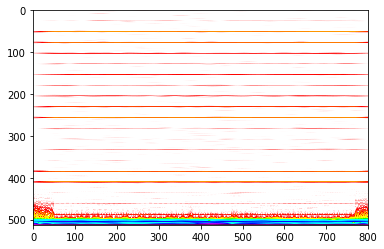

In [9]:
# Show one of the train spectograms
sample = train_data_df.sample()
plt.imshow(skimage.io.imread(sample.ch4.iloc[0]))

In [10]:
skimage.io.imread(sample.ch4.iloc[0]).shape

(513, 800, 3)

In [11]:
# shufle data frame to make diferent datasets
shuffled_df = train_data_df.sample(frac=1).reset_index(drop=True)
shuffled_df.head()

,ch1,ch2,ch3,ch4,label
0,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
1,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
2,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,one
3,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two
4,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,/home/jp_capo_98/Documents/ML-Silent-Speech-Re...,two


In [12]:
shuffled_df.shape

(5119, 5)

### Separate train data

In [13]:
# clean labels
labels = np.array([one_hot_encoding[val] for val in shuffled_df.label.values])
labels[0]

array([0, 1])

In [14]:
# training data
train_data_labels = labels[:4609]
train_data_ch1 = shuffled_df.ch1.values[:4609]
train_data_ch2 = shuffled_df.ch2.values[:4609]
train_data_ch3 = shuffled_df.ch3.values[:4609]
train_data_ch4 = shuffled_df.ch4.values[:4609]

In [15]:
# validation data
validation_data_labels = labels[4609:]
validation_data_ch1 = shuffled_df.ch1.values[4609:]
validation_data_ch2 = shuffled_df.ch2.values[4609:]
validation_data_ch3 = shuffled_df.ch3.values[4609:]
validation_data_ch4 = shuffled_df.ch4.values[4609:]

### Prepare test data

In [16]:
test_data_filenames = test_data_df["filename"]
test_data_filenames.head()

0    Y3K7JETF
1    W6HOIV84
2    UT7X0FXK
3    396IEJUQ
4    ETWR1EHV
Name: filename, dtype: object

In [17]:
test_data_ch1 = test_data_df["ch1"]
test_data_ch2 = test_data_df["ch2"]
test_data_ch3 = test_data_df["ch3"]
test_data_ch4 = test_data_df["ch4"]

### Helper functions

In [18]:
# weight initialization helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return(tf.Variable(init_random_dist))

In [19]:
# bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,  shape=shape)
    return (tf.Variable(init_bias_vals))

In [20]:
# 2d convolutional layer
def conv2d(x, W):
    return (tf.nn.conv2d(x, W, strides=[1,1,1,1], padding="SAME"))

In [21]:
# max pool layer
def max_pool_2by2(x):
    return (tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME"))

In [22]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return (tf.nn.relu(conv2d(input_x, W)+b))

In [23]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.nn.relu(tf.matmul(input_layer, W)+b))

In [24]:
def output_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)

## GRAPH

### Placeholders

In [25]:
with tf.name_scope("Inputs"):
    # getting images
    ch1_input = tf.placeholder(tf.float32, shape=[None, 50, 200, 3], name="ch1_input")
    ch2_input = tf.placeholder(tf.float32, shape=[None, 50, 200, 3], name="ch2_input")
    ch3_input = tf.placeholder(tf.float32, shape=[None, 50, 200, 3], name="ch3_input")
    ch4_input = tf.placeholder(tf.float32, shape=[None, 50, 200, 3], name="ch4_input")
    # gettin the one hot labels
    y_true = tf.placeholder(tf.float32, shape=[None, 2], name="labels")
    # getting hold probability value
    hold_prob = tf.placeholder(tf.float32, name="hold_probability")
    # batch size
    batch_size = tf.placeholder(tf.int64, name="batch_size")
    # number of parallel calls for dataset map
    num_par_calls = tf.placeholder(tf.int32, name="num_par_calls")
    # learning rate
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

### Datasets

In [26]:
### image parsing fn
def _image_parse_fn(label, ch1, ch2, ch3, ch4):
    # reading file
    ch1_img = tf.read_file(ch1)
    ch2_img = tf.read_file(ch2)
    ch3_img = tf.read_file(ch3)
    ch4_img = tf.read_file(ch4)
    # image decoding
    ch1_img_decoded = tf.image.decode_png(ch1_img)
    ch2_img_decoded = tf.image.decode_png(ch2_img)
    ch3_img_decoded = tf.image.decode_png(ch3_img)
    ch4_img_decoded = tf.image.decode_png(ch4_img)
    # image cropping
    ch1_img_resized = tf.image.crop_to_bounding_box(ch1_img_decoded, 463, 0, 50, 800)
    ch2_img_resized = tf.image.crop_to_bounding_box(ch2_img_decoded, 463, 0, 50, 800)
    ch3_img_resized = tf.image.crop_to_bounding_box(ch3_img_decoded, 463, 0, 50, 800)
    ch4_img_resized = tf.image.crop_to_bounding_box(ch4_img_decoded, 463, 0, 50, 800)
    # resize images
    ch1_img_resized = tf.image.resize_images(ch1_img_resized, [50, 200])
    ch2_img_resized = tf.image.resize_images(ch2_img_resized, [50, 200])
    ch3_img_resized = tf.image.resize_images(ch3_img_resized, [50, 200])
    ch4_img_resized = tf.image.resize_images(ch4_img_resized, [50, 200])
    # normalize images
    ch1_img_normalized = tf.div(ch1_img_resized, 255)
    ch2_img_normalized = tf.div(ch2_img_resized, 255)
    ch3_img_normalized = tf.div(ch3_img_resized, 255)
    ch4_img_normalized = tf.div(ch4_img_resized, 255)
    return (label, ch1_img_normalized, ch2_img_normalized, ch3_img_normalized, ch4_img_normalized)
    
    

In [27]:
### Datasets
with tf.name_scope("Datasets"):
    # Train Datasets
    with tf.name_scope("Train_Dataset"):
        train_dataset = tf.data.Dataset.from_tensor_slices((train_data_labels,
                                                           train_data_ch1,
                                                           train_data_ch2,
                                                           train_data_ch3,
                                                           train_data_ch4))
        train_dataset = train_dataset.shuffle(10000)
        train_dataset = train_dataset.repeat()
        train_dataset = train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        train_dataset = train_dataset.batch(batch_size)
    
    # train evaluation dataset    
    with tf.name_scope("eval_train_dataset"):
        eval_train_dataset = tf.data.Dataset.from_tensor_slices((train_data_labels,
                                                           train_data_ch1,
                                                           train_data_ch2,
                                                           train_data_ch3,
                                                           train_data_ch4))
        eval_train_dataset = eval_train_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        eval_train_dataset = eval_train_dataset.batch(batch_size)
    
    # Validation dataset with only one epoch and no shuffle
    with tf.name_scope("validation_dataset"):
        validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data_labels,
                                                           validation_data_ch1,
                                                           validation_data_ch2,
                                                           validation_data_ch3,
                                                           validation_data_ch4))
        validation_dataset = validation_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        validation_dataset = validation_dataset.batch(batch_size)
    
    # test dataset with only one epoch and no shuffle
    with tf.name_scope("test_dataset"):
        test_dataset = tf.data.Dataset.from_tensor_slices((test_data_filenames,
                                                           test_data_ch1,
                                                           test_data_ch2,
                                                           test_data_ch3,
                                                           test_data_ch4))
        test_dataset = test_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
        test_dataset = test_dataset.batch(batch_size)
    

### Iterators

In [28]:
with tf.name_scope("Iterator"):
    # train iterator
    with tf.name_scope("Train_Iterator"):
        train_iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
        next_element_train = train_iterator.get_next()
        train_init_op = train_iterator.make_initializer(train_dataset)
    # train evaluation iterator
    with tf.name_scope("train_evaluation_iterator"):
        eval_train_iterator = tf.data.Iterator.from_structure(eval_train_dataset.output_types, eval_train_dataset.output_shapes)
        next_element_eval_train = eval_train_iterator.get_next()
        eval_train_init_op = eval_train_iterator.make_initializer(eval_train_dataset)
    # validation iterator
    with tf.name_scope("validation_iterator"):
        validation_iterator = tf.data.Iterator.from_structure(validation_dataset.output_types, validation_dataset.output_shapes)
        next_element_validation = validation_iterator.get_next()
        validation_init_op = validation_iterator.make_initializer(validation_dataset)
    # test iterator
    with tf.name_scope("test_iterator"):
        test_iterator = tf.data.Iterator.from_structure(test_dataset.output_types, test_dataset.output_shapes)
        next_element_test = test_iterator.get_next()
        test_init_op = test_iterator.make_initializer(test_dataset)

### Image concatenation

In [29]:
with tf.name_scope("input_manipulation"):
    concat_input = tf.concat([ch1_input, ch2_input, ch3_input, ch4_input], 3, name="Image_concat")

### First Block - Convolutional and maxpool

In [30]:
with tf.name_scope("First_cnn_block"):
    convo_1 = convolutional_layer(concat_input, shape=[5, 3, 12, 128])
    maxpool_1 = max_pool_2by2(convo_1)
    dropout_1 = tf.nn.dropout(maxpool_1, keep_prob=hold_prob)

### Second Block - Convolutional and maxpool

In [31]:
with tf.name_scope("Second_cnn_block"):
    convo_2 = convolutional_layer(dropout_1, shape=[5, 3, 128, 256])
    maxpool_2 = max_pool_2by2(convo_2)
    dropout_2 = tf.nn.dropout(maxpool_2, keep_prob=hold_prob)

### Third Block - 2 Convolutionals and maxpool

In [32]:
with tf.name_scope("Third_cnn_block"):
    convo_3 = convolutional_layer(dropout_2, shape=[3, 3, 256, 384])
    convo_4 = convolutional_layer(convo_3, shape=[3, 3, 384, 384])
    maxpool_3 = max_pool_2by2(convo_4)
    dropout_3 = tf.nn.dropout(maxpool_3, keep_prob=hold_prob)
# output shape: [None, 7, 25,384]

### Fourth block - 2 Dense layers

In [33]:
with tf.name_scope("Dense_layers_block"):
    flatten_1 = tf.reshape(dropout_3, [-1, 7*25*384])
    dense_layer_1 = normal_full_layer(flatten_1, 256)
    dense_layer_2 = normal_full_layer(dense_layer_1, 128)
    dropout_4 = tf.nn.dropout(dense_layer_2, keep_prob=hold_prob)

### Output_layer

In [34]:
with tf.name_scope("Output_layer"):
    y_pred = output_full_layer(dropout_4, 2)

### Loss function

In [35]:
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred)
    mean_cross_entropy = tf.reduce_mean(cross_entropy)

### Optimizer

In [36]:
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### Train function

In [37]:
with tf.name_scope("training"):
    train = optimizer.minimize(mean_cross_entropy)

### Prediction Function

In [38]:
with tf.name_scope("Predicting"):
    y_soft = tf.nn.softmax(y_pred)
    prediction = tf.argmax(y_soft, axis=1)

### Evalution Metrics - Accuracy, Loss

In [39]:
# Accuracy
with tf.name_scope("Accuracy_tensorboard"):
    y_true_arg_max = tf.argmax(y_true, axis=1)
    correct_predictions = tf.equal(prediction, y_true_arg_max)
    batch_acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    acc_arr = tf.placeholder(tf.float32)
    full_accuracy = tf.reduce_mean(acc_arr)
    accuracy_summary = tf.summary.scalar("Accuracy", full_accuracy)

In [40]:
# Loss
with tf.name_scope("Loss_tensorboard"):
    loss_arr = tf.placeholder(tf.float32)
    full_loss = tf.reduce_mean(loss_arr)
    loss_summary = tf.summary.scalar("Loss", full_loss)

In [41]:
# Summary merger
merged_op = tf.summary.merge_all()

### Checkpoint saver

In [42]:
saver = tf.train.Saver()

### Variable initializer

In [43]:
init = tf.global_variables_initializer()

In [63]:
batch_size_input = 32
number_of_par_calls = 4
learning_rate_input = 0.001
dropout_input = 0.7
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    # initiate variables
    #sess.run(init)
    
    
    saver.restore(sess, "./model/final.ckpy")
    
    # create filewriters for tensorboard
    train_writer = tf.summary.FileWriter("./tensorboard/train_run2", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation_run2", graph=tf.get_default_graph())
    
    # initiate training iterator
    dataset_feed = {batch_size:batch_size_input, num_par_calls:number_of_par_calls}
    sess.run(train_init_op, feed_dict=dataset_feed)
    
    # training
    for step in range(5301, 10001):
        fine = 1
        # saving summary every one hundred steps
        if step % 100 == 0:
            # Evaluate training data metrics
            acc = []
            loss = []
            sess.run(eval_train_init_op, feed_dict=dataset_feed)
            # run one epoch on training evaluation dataset
            for i in range(35):
                fine = 1
                try:
                    batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_eval_train)
                except tf.errors.OutOfRangeError:
                    break
                except tf.errors.InvalidArgumentError:
                    fine = 0
                if (fine == 1):
                    train_eval_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                        ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
                    acc.append(sess.run(batch_acc, feed_dict=train_eval_feed))
                    loss.append(sess.run(mean_cross_entropy, feed_dict=train_eval_feed))
                fine = 1
            train_eval_feed = {acc_arr: acc, loss_arr:loss}
            # save the summary
            summary = sess.run(merged_op, feed_dict=train_eval_feed)
            train_writer.add_summary(summary, step)
            train_writer.flush()
            print("Saved train summary at step #{}".format(step))
            
            # Evaluate validation data metrics
            acc = []
            loss = []
            sess.run(validation_init_op, feed_dict=dataset_feed)
            while True:
                fine = 1
                try:
                    batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_validation)
                except tf.errors.OutOfRangeError:
                    break
                except tf.errors.InvalidArgumentError:
                    fine = 0
                if (fine == 1):
                    validation_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                      ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
                    acc.append(sess.run(batch_acc, feed_dict=validation_feed))
                    loss.append(sess.run(mean_cross_entropy, feed_dict=validation_feed))
                fine = 1
            validation_feed = {acc_arr: acc, loss_arr:loss}
            summary = sess.run(merged_op, feed_dict=validation_feed)
            validation_writer.add_summary(summary, step)
            validation_writer.flush()
            print("Saved validation summary at step #{}".format(step))
        
        # Checkpoint saving every 1000 steps
        if step % 500 == 0:
            saver.save(sess, "./model/step_{}.ckpy".format(step))
            print("Saved checkpoint in step #{}".format(step))
        
        # training
        fine = 1
        try:
            batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_train)
        except tf.errors.InvalidArgumentError:
            fine = 0
        if (fine == 1):
            train_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
                      ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:dropout_input,
                      learning_rate:learning_rate_input}
            sess.run(train, feed_dict=train_feed)
        if step == 0:
            print("Finished first train call")
    
    saver.save(sess, "./model/final10k.ckpy")
    print("Training is done")

INFO:tensorflow:Restoring parameters from ./model/final.ckpy
Saved train summary at step #5400
Saved validation summary at step #5400
Saved train summary at step #5500
Saved validation summary at step #5500
Saved checkpoint in step #5500
Saved train summary at step #5600
Saved validation summary at step #5600
Saved train summary at step #5700
Saved validation summary at step #5700
Saved train summary at step #5800
Saved validation summary at step #5800
Saved train summary at step #5900
Saved validation summary at step #5900


KeyboardInterrupt: 

## Example Input

In [ ]:
batch_size_input = 1
number_of_par_calls = 2
learning_rate_input = 0.001
dropout_input = 1.0
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    # initiate variables
    sess.run(init)
    
    #saver.restore(sess, "./best_models/eightyfouracc/final.ckpy")
    
    # create filewriters for tensorboard
    train_writer = tf.summary.FileWriter("./tensorboard/train_run2", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation_run2", graph=tf.get_default_graph())
    
    # initiate training iterator
    dataset_feed = {batch_size:batch_size_input, num_par_calls:number_of_par_calls}
    sess.run(train_init_op, feed_dict=dataset_feed)
    sess.run(validation_init_op, feed_dict=dataset_feed)
            # run one epoch on training evaluation dataset
    while True:
        try:
            batch_labels, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_validation)
        except tf.errors.OutOfRangeError:
            break
        except tf.errors.InvalidArgumentError:
            print(batch_labels)
        train_eval_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
            ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
#     train_feed = {y_true:batch_labels, ch1_input:batch_ch1, ch2_input:batch_ch2,
#                   ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:dropout_input,
#                   learning_rate:learning_rate_input}
#     res = sess.run(dropout_3, feed_dict=train_feed)
    

In [ ]:
batch_labels.shape

In [ ]:
plt.imshow(res[1][0])

## Predictions

In [47]:
batch_size_input = 32
number_of_par_calls = 4
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess, "./model/final.ckpy")
    
    dataset_feed = {batch_size:batch_size_input, num_par_calls:number_of_par_calls}
    sess.run(test_init_op, feed_dict=dataset_feed)
    results = {"filename":[], "label":[]}
    acc = []
    loss = []
    i = 1
    while True:
        try:
            filenames, batch_ch1, batch_ch2, batch_ch3, batch_ch4 = sess.run(next_element_test)
        except tf.errors.OutOfRangeError:
            break
        test_feed = {ch1_input:batch_ch1, ch2_input:batch_ch2,
                  ch3_input:batch_ch3, ch4_input:batch_ch4, hold_prob:1.0}
        result = sess.run(prediction, feed_dict=test_feed)
        for file in filenames:
            results["filename"].append(file.decode())
        for res in result:
            results["label"].append(res + 1)
        print("Number: {}".format(i))
        i += 1
        

INFO:tensorflow:Restoring parameters from ./model/final.ckpy
Number: 1
Number: 2
Number: 3
Number: 4
Number: 5
Number: 6
Number: 7
Number: 8
Number: 9
Number: 10
Number: 11
Number: 12
Number: 13
Number: 14
Number: 15
Number: 16
Number: 17
Number: 18
Number: 19
Number: 20
Number: 21
Number: 22
Number: 23
Number: 24
Number: 25
Number: 26
Number: 27
Number: 28
Number: 29
Number: 30
Number: 31
Number: 32


In [48]:
final_results = pd.DataFrame(results)
final_results.head()

,filename,label
0,Y3K7JETF,2
1,W6HOIV84,1
2,UT7X0FXK,2
3,396IEJUQ,1
4,ETWR1EHV,1


In [49]:
final_results.set_index("filename", inplace=True)

In [61]:
final_results["label"].value_counts()

2    535
1    467
Name: label, dtype: int64

In [51]:
final_results.to_csv("~/results_subvocal.csv")

In [ ]:
print("Final accuracy: {}\tFinal Loss: {}".format(final_test_accuracy, final_test_loss))

In [ ]:
final_dataset = tf.data.Dataset.from_tensor_slices((final_filenames,
                                                    final_ch1,
                                                    final_ch2,
                                                    final_ch3,
                                                    final_ch4))
final_dataset = final_dataset.map(_image_parse_fn, num_parallel_calls=num_par_calls)
final_dataset = final_dataset.batch(batch_size)

In [ ]:
final_iterator = tf.data.Iterator.from_structure(test_dataset.output_types, test_dataset.output_shapes)
next_element_final = final_iterator.get_next()
final_init_op = final_iterator.make_initializer(test_dataset)